In [76]:
# Necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [34]:
sac_rentals = pd.read_csv('property_listings.csv')
sac_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742 entries, 0 to 2741
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        2742 non-null   int64  
 1   Date         2742 non-null   object 
 2   Heading      2742 non-null   object 
 3   Web_Address  2742 non-null   object 
 4   Price        2742 non-null   int64  
 5   BedRooms     2642 non-null   float64
 6   SQFT         2549 non-null   float64
 7   Location     2742 non-null   object 
 8   BathRooms    2742 non-null   object 
 9   Attributes   2742 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 214.3+ KB


In [35]:
sac_rentals.head()

,index,Date,Heading,Web_Address,Price,BedRooms,SQFT,Location,BathRooms,Attributes
0,0,Jan 13,Rent 3 bad. 1 . 5. Bathroom,https://sacramento.craigslist.org/apa/d/sacram...,2100,3.0,1344.0,Sacramento,1.5Ba,"['flooring: other', 'townhouse', 'w/d in unit'..."
1,1,Jan 13,"3-bedroom, 1-bath farmhouse in Elk Grove",https://sacramento.craigslist.org/apa/d/elk-gr...,2200,3.0,1130.0,Elk Grove,1Ba,"['cats are OK - purrr', 'dogs are OK - wooof',..."
2,2,Jan 13,"State of the Art Fitness Center, Stainless Ste...",https://sacramento.craigslist.org/apa/d/fair-o...,2116,1.0,700.0,"Fair Oaks, Carmichael, Orangevale, Folsom, Cit...",1Ba,['application fee details: $49 Application Fee...
3,3,Jan 13,Huge 2 Bedroom 2 Bath - just renovated with fu...,https://sacramento.craigslist.org/apa/d/west-s...,2308,2.0,1233.0,,2Ba,"['cats are OK - purrr', 'dogs are OK - wooof',..."
4,4,Jan 13,1x1 W/ Wrap Around Patio! Fully Upgraded!,https://sacramento.craigslist.org/apa/d/rockli...,1950,1.0,774.0,Rocklin,1Ba,"['cats are OK - purrr', 'dogs are OK - wooof',..."


In [4]:
sac_rentals.columns

Index(['index', 'Date', 'Heading', 'Web_Address', 'Price', 'BedRooms', 'SQFT',
       'Location', 'BathRooms', 'Attributes'],
      dtype='object')

In [5]:
sac_rentals.shape

(2742, 10)

In [36]:
def no_smoke(smoking):
    if 'no smoking' in smoking:
        return '1'
    else:
        return '0'

In [37]:
sac_rentals['No_Smoke'] = sac_rentals['Attributes'].apply(lambda smoking: no_smoke(smoking)).astype(float)

In [38]:
def no_park(parking):
    if 'no parking' in parking:
        return '1'
    else:
        return '0'

In [39]:
sac_rentals['No_Park'] = sac_rentals['Attributes'].apply(lambda parking: no_park(parking)).astype(float)

In [40]:
def unit_laundry(in_unit_laundry):
    if 'w/d in unit' in in_unit_laundry:
        return '1'
    else:
        return '0'

In [41]:
sac_rentals['W_D_Lndry'] = sac_rentals['Attributes'].apply(lambda in_unit_laundry: unit_laundry(in_unit_laundry)).astype(float)

In [42]:
def pets(no_pets):
    if ('cats are OK - purrr' in no_pets) | ('dogs are OK - wooof' in no_pets):
        return '1'
    else:
        return '0'

In [43]:
sac_rentals['Pets'] = sac_rentals['Attributes'].apply(lambda no_pets: pets(no_pets)).astype(float)

In [44]:
def properties(apartment_house):
    if 'apartment' in apartment_house:
        return '1'
    elif 'house' in apartment_house:
        return '2'
    else:
        return '0'

In [45]:
sac_rentals['Property_Type'] = sac_rentals['Attributes'].apply(lambda apartment_house: properties(apartment_house)).astype(float)

In [46]:
sac_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742 entries, 0 to 2741
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2742 non-null   int64  
 1   Date           2742 non-null   object 
 2   Heading        2742 non-null   object 
 3   Web_Address    2742 non-null   object 
 4   Price          2742 non-null   int64  
 5   BedRooms       2642 non-null   float64
 6   SQFT           2549 non-null   float64
 7   Location       2742 non-null   object 
 8   BathRooms      2742 non-null   object 
 9   Attributes     2742 non-null   object 
 10  No_Smoke       2742 non-null   float64
 11  No_Park        2742 non-null   float64
 12  W_D_Lndry      2742 non-null   float64
 13  Pets           2742 non-null   float64
 14  Property_Type  2742 non-null   float64
dtypes: float64(7), int64(2), object(6)
memory usage: 321.5+ KB


In [ ]:
sac_rentals.BathRooms.head()

In [47]:
sac_rentals = sac_rentals[sac_rentals.BathRooms != 'sharedBa']

In [48]:
sac_rentals['BathRooms'] = sac_rentals.loc[:,'BathRooms'].str.replace('Ba', '').astype(float)

In [49]:
sac_rentals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2723 entries, 0 to 2741
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2723 non-null   int64  
 1   Date           2723 non-null   object 
 2   Heading        2723 non-null   object 
 3   Web_Address    2723 non-null   object 
 4   Price          2723 non-null   int64  
 5   BedRooms       2636 non-null   float64
 6   SQFT           2546 non-null   float64
 7   Location       2723 non-null   object 
 8   BathRooms      2723 non-null   float64
 9   Attributes     2723 non-null   object 
 10  No_Smoke       2723 non-null   float64
 11  No_Park        2723 non-null   float64
 12  W_D_Lndry      2723 non-null   float64
 13  Pets           2723 non-null   float64
 14  Property_Type  2723 non-null   float64
dtypes: float64(8), int64(2), object(5)
memory usage: 340.4+ KB


In [50]:
sac_rentals.dropna(inplace=True)

In [52]:
sac_rentals.sort_values(['Date', 'Heading', 'Price'], inplace=True)

In [53]:
sac_rentals.drop_duplicates(keep=False, inplace=True)

In [54]:
sac_rentals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477 entries, 2696 to 98
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2477 non-null   int64  
 1   Date           2477 non-null   object 
 2   Heading        2477 non-null   object 
 3   Web_Address    2477 non-null   object 
 4   Price          2477 non-null   int64  
 5   BedRooms       2477 non-null   float64
 6   SQFT           2477 non-null   float64
 7   Location       2477 non-null   object 
 8   BathRooms      2477 non-null   float64
 9   Attributes     2477 non-null   object 
 10  No_Smoke       2477 non-null   float64
 11  No_Park        2477 non-null   float64
 12  W_D_Lndry      2477 non-null   float64
 13  Pets           2477 non-null   float64
 14  Property_Type  2477 non-null   float64
dtypes: float64(8), int64(2), object(5)
memory usage: 309.6+ KB


In [55]:
sac_rentals.to_csv('formated_rental_listings.csv', index=False)

In [56]:
sac_rentals.drop(['index','Date', 'Heading', 'Web_Address', 'Location','Attributes'], axis=1, inplace=True)

In [57]:
sac_rentals.corr()

,Price,BedRooms,SQFT,BathRooms,No_Smoke,No_Park,W_D_Lndry,Pets,Property_Type
Price,1.000000,0.541859,0.112194,0.533321,0.115555,-0.047486,0.266608,0.003021,0.291846
BedRooms,0.541859,1.000000,0.125315,0.780326,0.175852,-0.031657,-0.032290,-0.040784,0.450939
SQFT,0.112194,0.125315,1.000000,0.110765,0.006699,-0.007224,-0.047827,-0.077670,0.102489
BathRooms,0.533321,0.780326,0.110765,1.000000,0.132350,-0.030493,0.132776,-0.032195,0.274081
No_Smoke,0.115555,0.175852,0.006699,0.132350,1.000000,-0.013182,-0.001603,0.189996,0.099599
No_Park,-0.047486,-0.031657,-0.007224,-0.030493,-0.013182,1.000000,-0.037941,0.029666,-0.008535
W_D_Lndry,0.266608,-0.032290,-0.047827,0.132776,-0.001603,-0.037941,1.000000,0.112949,-0.145763
Pets,0.003021,-0.040784,-0.077670,-0.032195,0.189996,0.029666,0.112949,1.000000,-0.093249
Property_Type,0.291846,0.450939,0.102489,0.274081,0.099599,-0.008535,-0.145763,-0.093249,1.000000


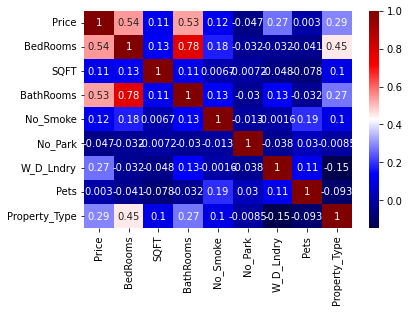

In [58]:
sns.heatmap(sac_rentals.corr(), cmap='seismic', annot=True, vmax=1);

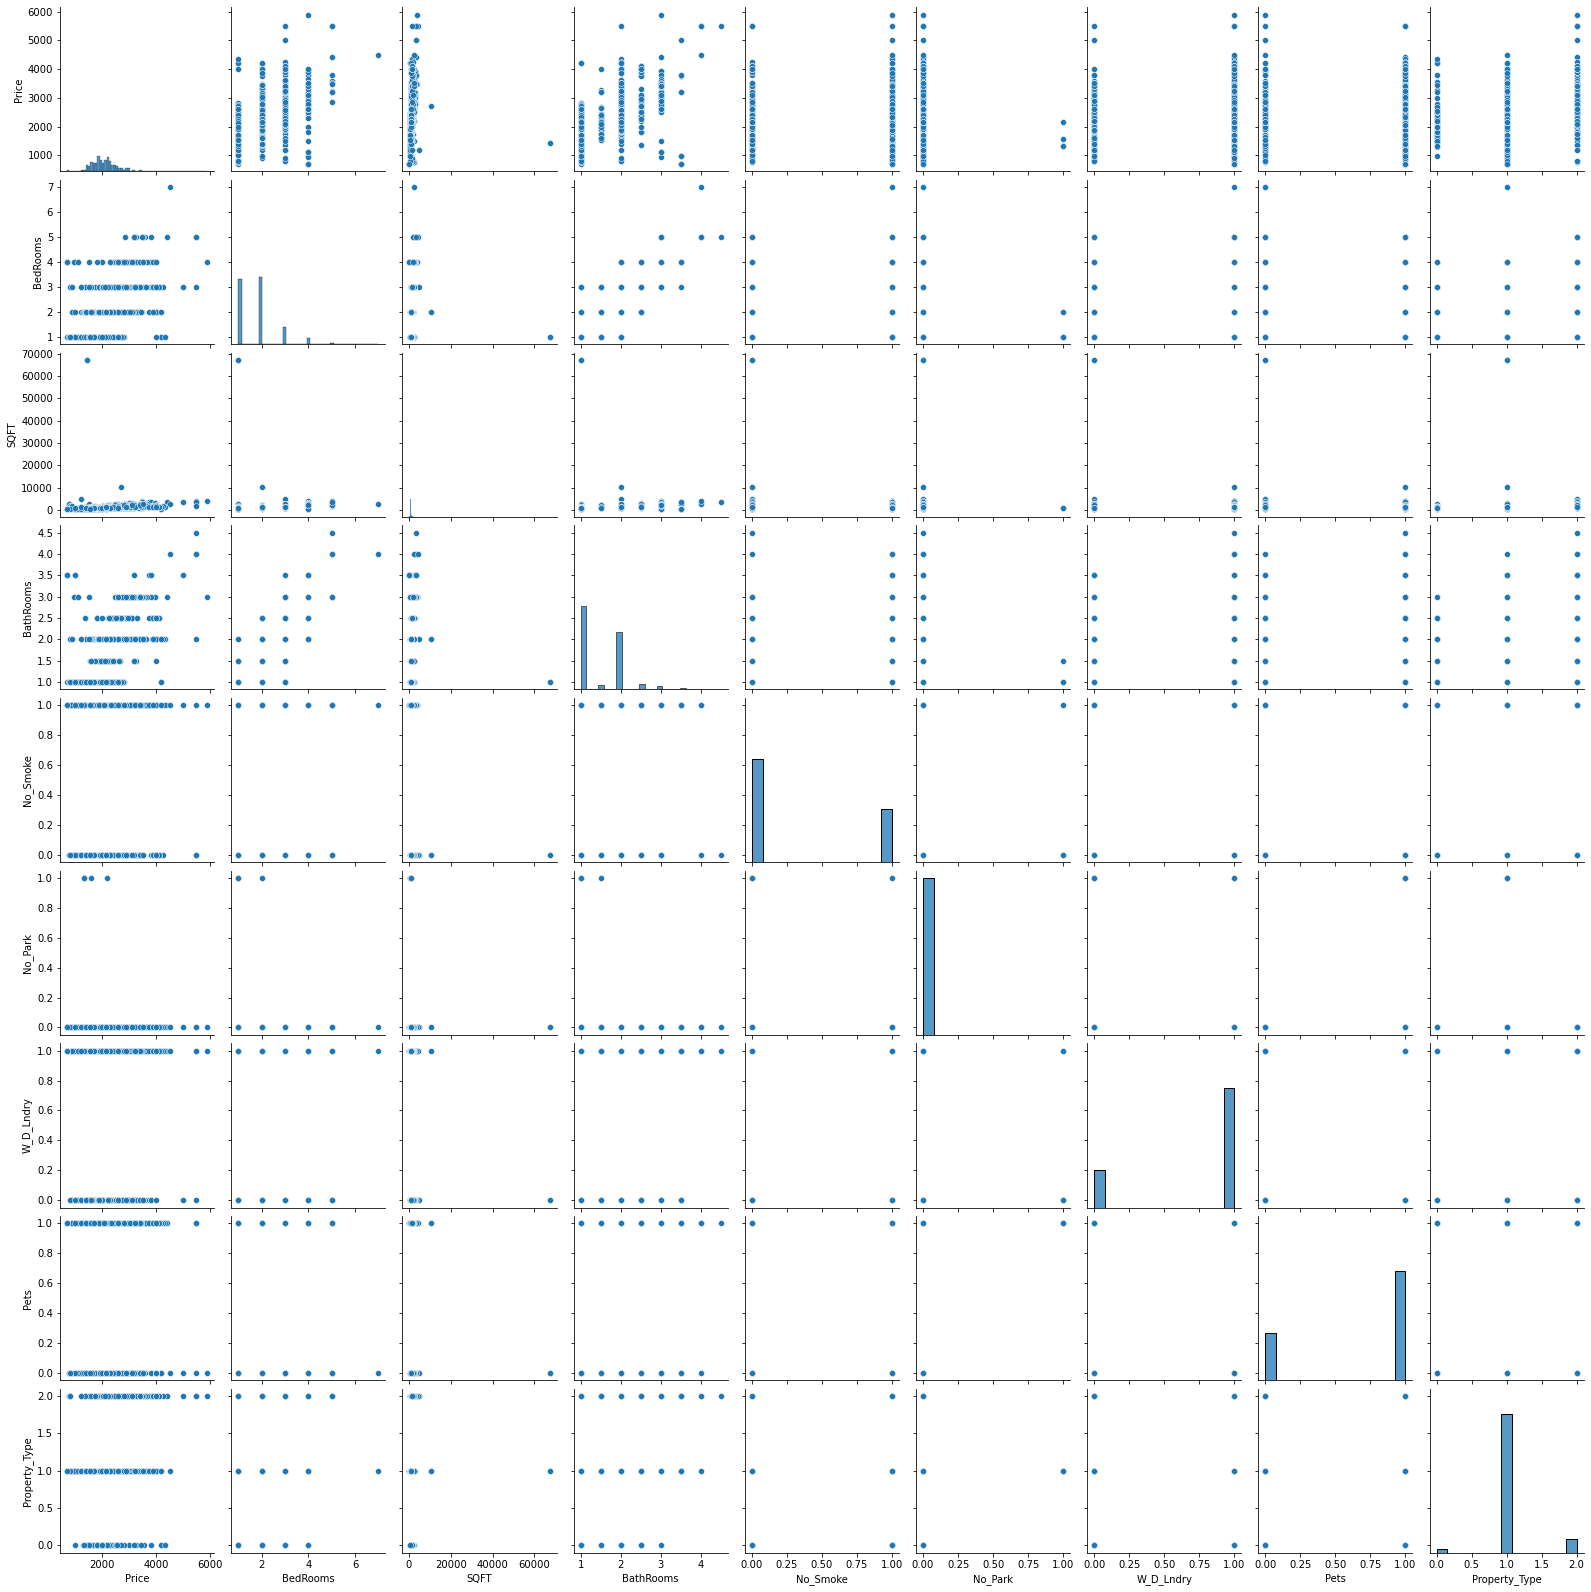

In [59]:
sns.pairplot(sac_rentals, height=1.2, aspect=1.5);

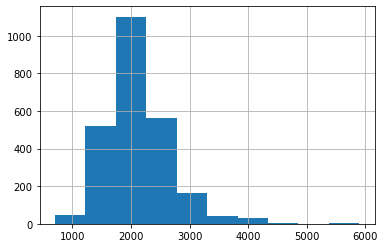

In [61]:

sac_rentals.Price.hist();

<AxesSubplot:>

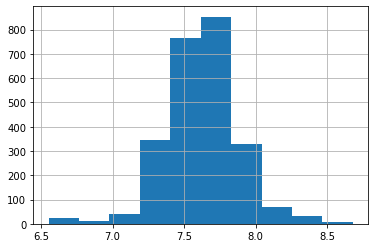

In [62]:
#sac_rentals['log_price'] = np.log(sac_rentals.Price)
#sac_rentals.log_price.hist()

np.log(sac_rentals.Price).hist()

In [63]:
sac_rentals.corr()['Price'].sort_values(ascending=False)


Price            1.000000
BedRooms         0.541859
BathRooms        0.533321
Property_Type    0.291846
W_D_Lndry        0.266608
No_Smoke         0.115555
SQFT             0.112194
Pets             0.003021
No_Park         -0.047486
Name: Price, dtype: float64

<AxesSubplot:>

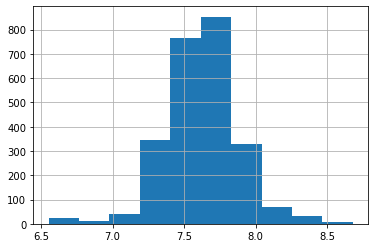

In [64]:
sac_rentals['Log_Price'] = np.log(sac_rentals.Price)
sac_rentals.Log_Price.hist()

In [66]:
sac_rentals.corr()['Log_Price'].sort_values(ascending=False)

Log_Price        1.000000
Price            0.967862
BedRooms         0.457452
BathRooms        0.450221
W_D_Lndry        0.303293
Property_Type    0.244035
SQFT             0.095902
No_Smoke         0.077474
Pets             0.012518
No_Park         -0.054344
Name: Log_Price, dtype: float64

In [67]:
sac_rentals.columns

Index(['Price', 'BedRooms', 'SQFT', 'BathRooms', 'No_Smoke', 'No_Park',
       'W_D_Lndry', 'Pets', 'Property_Type', 'Log_Price'],
      dtype='object')

In [73]:
# slice data into features and target
X_orgi = sac_rentals.drop(columns = ['Price', 'Log_Price'])
X_org = sm.add_constant(X_orgi)

y_org = sac_rentals.loc[:, 'Price']

# fit model with target as housing price index 
log_model = sm.OLS(y_org, X_org, data=sac_rentals) 

# fit our model 
results = log_model.fit()
results.summary()

/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     206.5
Date:                Mon, 24 Jan 2022   Prob (F-statistic):          5.05e-268
Time:                        09:05:55   Log-Likelihood:                -18531.
No. Observations:                2477   AIC:                         3.708e+04
Df Residuals:                    2468   BIC:                         3.713e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           945.0646     39.903     23.684      0.000     866.818    1023.311
BedRooms        223.7820     18.514     12.087      0.000     187.478     260.086
SQFT              0.0142      0.005      3.128      0.002       0.005       0.023
BathRooms       181.2697     24.020      7.547      0.000     134.169     228.371
No_Smoke         21.0040     18.954      1.108      0.268     -16.164      58.172
No_Park        -237.5678    192.926     -1.231      0.218    -615.881     140.745
W_D_Lndry       350.9178     21.232     16.527      0.000     309.283     392.553
Pets              5.6267     19.451      0.289      0.772     -32.515      43.768
Property_Type   202.7088     29.991      6.759      0.000     143.898     261.520
==============================================================================
Omnibus:                      544.196   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13892.190
Skew:                          -0.411   Prob(JB):                         0.00
Kurtosis:                      14.573   Cond. No.                     4.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

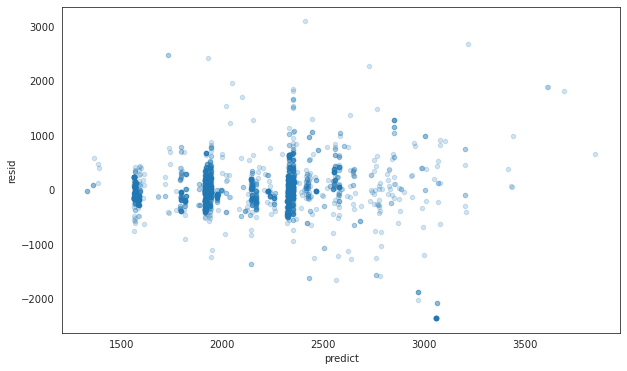

In [74]:
# Plot your predicted values on the x-axis, and your residuals on the y-axis
sac_rentals['predict'] = results.predict(X_org)
sac_rentals['resid'] = sac_rentals.Price - sac_rentals.predict
with sns.axes_style('white'):
    plot=sac_rentals.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))

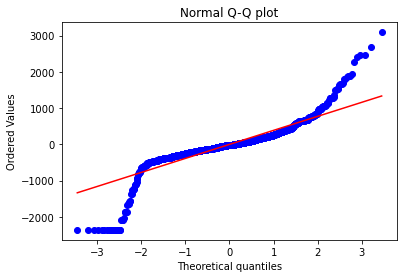

In [77]:
# diagnose/inspect residual normality using qqplot:
stats.probplot(sac_rentals['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [78]:
influence = results.get_influence()
influence_frame = influence.summary_frame().reset_index()

In [79]:
influence_frame.cooks_d.sort_values(ascending=False).head()

1439    1.291837
1440    1.291837
199     0.042459
2222    0.030516
898     0.030338
Name: cooks_d, dtype: float64

In [80]:
vif = pd.DataFrame()
vif['variables'] = X_org.columns
vif['vif'] =[variance_inflation_factor(X_org.values, i) for i in range(X_org.shape[1])]
vif

,variables,vif
0,const,21.317351
1,BedRooms,3.141446
2,SQFT,1.025883
3,BathRooms,2.770452
4,No_Smoke,1.077346
5,No_Park,1.003859
6,W_D_Lndry,1.100294
7,Pets,1.070105
8,Property_Type,1.309269


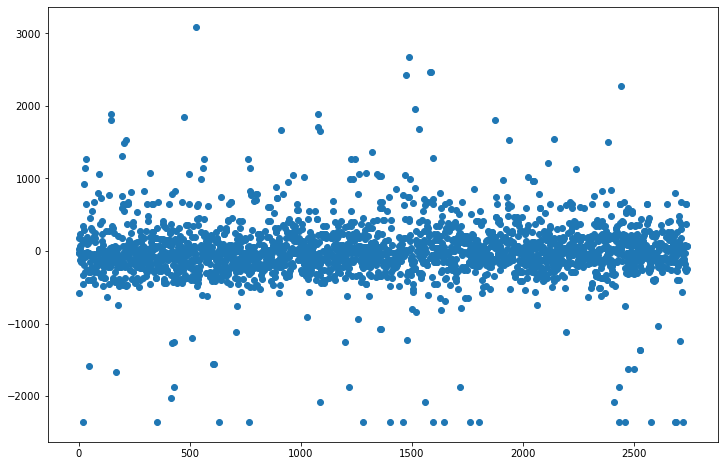

In [87]:
sac_rentals.resid.plot(style='o', figsize=(12,8));

In [ ]:
## Outliers of Features

In [88]:
sac_rentals.describe()

,Price,BedRooms,SQFT,BathRooms,No_Smoke,No_Park,W_D_Lndry,Pets,Property_Type,Log_Price,predict,resid
count,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2.477000e+03
mean,2124.113040,1.782398,1021.132015,1.506056,0.338716,0.002019,0.760194,0.696811,1.062576,7.628579,2124.113040,3.641787e-09
std,554.834962,0.827562,1933.634067,0.599006,0.473369,0.044892,0.427051,0.459729,0.329795,0.257046,351.322487,4.294349e+02
min,700.000000,1.000000,245.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.551080,1330.232008,-2.358364e+03
25%,1790.000000,1.000000,725.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,7.489971,1917.428748,-1.688593e+02
50%,2065.000000,2.000000,854.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,7.632886,2139.762342,-2.388513e+01
75%,2377.000000,2.000000,1092.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,7.773594,2331.885133,1.573935e+02
max,5895.000000,7.000000,67200.000000,4.500000,1.000000,1.000000,1.000000,1.000000,2.000000,8.681860,3846.657173,3.092064e+03


In [103]:
outliers = sac_rentals[sac_rentals.SQFT > 3000]
print(len(outliers))
outliers

16


,Price,BedRooms,SQFT,BathRooms,No_Smoke,No_Park,W_D_Lndry,Pets,Property_Type,Log_Price,predict,resid
2688,3750,4.0,3411.0,3.5,1.0,0.0,0.0,1.0,2.0,8.229511,2954.997210,795.002790
2442,5000,3.0,3500.0,3.5,1.0,0.0,0.0,0.0,2.0,8.517193,2726.849147,2273.150853
2052,3490,5.0,3753.0,3.0,1.0,0.0,1.0,0.0,2.0,8.157657,3438.279487,51.720513
1898,2700,2.0,10335.0,2.0,0.0,0.0,1.0,1.0,1.0,7.901007,2460.803158,239.196842
1782,3800,4.0,3500.0,3.5,1.0,0.0,0.0,0.0,2.0,8.242756,2950.631114,849.368886
1487,5895,4.0,4000.0,3.0,1.0,0.0,1.0,0.0,2.0,8.681860,3217.995954,2677.004046
1491,4425,5.0,3425.0,3.0,1.0,0.0,1.0,1.0,2.0,8.395026,3439.260458,985.739542
1504,2999,3.0,3085.0,2.5,1.0,0.0,0.0,0.0,1.0,8.006034,2336.992643,662.007357
1201,1200,3.0,4830.0,2.0,0.0,0.0,0.0,0.0,2.0,7.090077,2452.778275,-1252.778275
1079,5500,5.0,3169.0,4.0,1.0,0.0,1.0,1.0,2.0,8.612503,3616.904269,1883.095731


In [96]:
outliers_price = sac_rentals[sac_rentals.Price > 4100]
print(len(outliers_price))
outliers_price

19


,Price,BedRooms,SQFT,BathRooms,No_Smoke,No_Park,W_D_Lndry,Pets,Property_Type,Log_Price,predict,resid
2442,5000,3.0,3500.0,3.5,1.0,0.0,0.0,0.0,2.0,8.517193,2726.849147,2273.150853
1876,4163,2.0,1115.0,2.0,1.0,0.0,1.0,1.0,1.0,8.333991,2351.217834,1811.782166
1487,5895,4.0,4000.0,3.0,1.0,0.0,1.0,0.0,2.0,8.681860,3217.995954,2677.004046
1491,4425,5.0,3425.0,3.0,1.0,0.0,1.0,1.0,2.0,8.395026,3439.260458,985.739542
1584,4200,1.0,600.0,1.0,1.0,0.0,1.0,0.0,0.0,8.342840,1730.536327,2469.463673
1585,4200,1.0,600.0,1.0,1.0,0.0,1.0,0.0,0.0,8.342840,1730.536327,2469.463673
1079,5500,5.0,3169.0,4.0,1.0,0.0,1.0,1.0,2.0,8.612503,3616.904269,1883.095731
1226,4125,3.0,1482.0,2.5,0.0,0.0,1.0,1.0,2.0,8.324821,2852.537570,1272.462430
1243,4125,3.0,1482.0,2.5,0.0,0.0,1.0,1.0,2.0,8.324821,2852.537570,1272.462430
1473,4350,1.0,1261.0,2.0,1.0,0.0,1.0,1.0,0.0,8.377931,1926.794919,2423.205081


In [102]:
outliers_price2 = sac_rentals[sac_rentals.Price > 3000]
print(len(outliers_price2))
outliers_price2.sort_values('resid')

132


,Price,BedRooms,SQFT,BathRooms,No_Smoke,No_Park,W_D_Lndry,Pets,Property_Type,Log_Price,predict,resid
2619,3100,4.0,2850.0,3.0,1.0,0.0,1.0,0.0,2.0,8.039157,3201.707696,-101.707696
2621,3100,4.0,2850.0,3.0,1.0,0.0,1.0,0.0,2.0,8.039157,3201.707696,-101.707696
2052,3490,5.0,3753.0,3.0,1.0,0.0,1.0,0.0,2.0,8.157657,3438.279487,51.720513
582,3495,5.0,3418.0,3.0,1.0,0.0,1.0,0.0,2.0,8.159089,3433.534647,61.465353
326,3200,5.0,2809.0,3.0,1.0,0.0,0.0,1.0,2.0,8.070906,3079.617769,120.382231
...,...,...,...,...,...,...,...,...,...,...,...,...
1473,4350,1.0,1261.0,2.0,1.0,0.0,1.0,1.0,0.0,8.377931,1926.794919,2423.205081
1585,4200,1.0,600.0,1.0,1.0,0.0,1.0,0.0,0.0,8.342840,1730.536327,2469.463673
1584,4200,1.0,600.0,1.0,1.0,0.0,1.0,0.0,0.0,8.342840,1730.536327,2469.463673
1487,5895,4.0,4000.0,3.0,1.0,0.0,1.0,0.0,2.0,8.681860,3217.995954,2677.004046


In [86]:
len(sac_rentals[sac_rentals.Location == sac_rentals.Location.isna()])

AttributeError: 'DataFrame' object has no attribute 'Location'

In [104]:
rentals_final =  sac_rentals[sac_rentals.Price < 4100]
rentals_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2458 entries, 2696 to 98
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          2458 non-null   int64  
 1   BedRooms       2458 non-null   float64
 2   SQFT           2458 non-null   float64
 3   BathRooms      2458 non-null   float64
 4   No_Smoke       2458 non-null   float64
 5   No_Park        2458 non-null   float64
 6   W_D_Lndry      2458 non-null   float64
 7   Pets           2458 non-null   float64
 8   Property_Type  2458 non-null   float64
 9   Log_Price      2458 non-null   float64
 10  predict        2458 non-null   float64
 11  resid          2458 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 249.6 KB


In [106]:
rentals =  rentals_final[rentals_final.SQFT < 3000]
rentals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2448 entries, 2696 to 98
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          2448 non-null   int64  
 1   BedRooms       2448 non-null   float64
 2   SQFT           2448 non-null   float64
 3   BathRooms      2448 non-null   float64
 4   No_Smoke       2448 non-null   float64
 5   No_Park        2448 non-null   float64
 6   W_D_Lndry      2448 non-null   float64
 7   Pets           2448 non-null   float64
 8   Property_Type  2448 non-null   float64
 9   Log_Price      2448 non-null   float64
 10  predict        2448 non-null   float64
 11  resid          2448 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 248.6 KB


In [107]:
rentals.drop(columns=['predict', 'resid'], axis=1, inplace=True )
rentals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2448 entries, 2696 to 98
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          2448 non-null   int64  
 1   BedRooms       2448 non-null   float64
 2   SQFT           2448 non-null   float64
 3   BathRooms      2448 non-null   float64
 4   No_Smoke       2448 non-null   float64
 5   No_Park        2448 non-null   float64
 6   W_D_Lndry      2448 non-null   float64
 7   Pets           2448 non-null   float64
 8   Property_Type  2448 non-null   float64
 9   Log_Price      2448 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 210.4 KB


/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [108]:
rentals.to_csv('formated_OutlierFixed.csv', index=False)